<a href="https://colab.research.google.com/github/murtazav/Model_predictive_control/blob/master/Bicycle_model_with_steering_actuator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
# bicycle model for autonomous ground vehicle
# parameters of test vehicle
mfl = 158  # mass at front left wheel
mfr = 137  # mass at front right wheel
mrl = 360  # mass at rear left wheel
mrr = 269  # mass at front right wheel

m = 924  #total mass
lf = 1.31  # location of centre of gravity from the front axle
lr = 0.62  # location of centre of gravity from the rear axle
Iz = 748  # moment of inertia
l = lf + lr
e = np.zeros(100000)
V = 1

# PID controller parameter 
kp =1.7
ki = 0.01
kd = 0
kp_phi = 0.01


# steering parameter
R = 0.317
L = 0.0000823
kt = 0.0302
kb = 0.0301
b = 0.0028677

# cornering stiffness
Cf = 27359
Cr = 58535
dt = 0.001
tf = 80
t1 = np.zeros(80000)
for i in range(1,int(tf/dt)):
	t1[i] = t1[i-1]+dt
I = np.zeros(100000)
phi_dot = np.zeros(100000)
delt = np.zeros(100000)
phi = np.zeros(100000)
phi_des = np.zeros(100000)
ki_phi = 0
vy = np.zeros(100000)
vy_dot = np.zeros(100000)
theta_dot =np.zeros(100000)
theta_ddot =np.zeros(100000)
theta = np.zeros(100000)
theta_des = np.zeros(100000)
i=1
e_phi = np.zeros(100000)
eint_phi = np.zeros(100000)
e_int = np.zeros(100000)
e_d = np.zeros(100000)
e = np.zeros(100000)
time = np.zeros(100000)
v = np.zeros(100000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


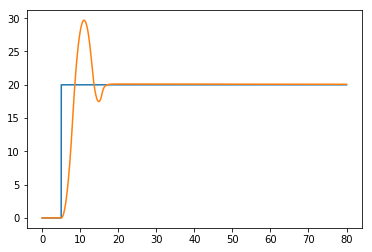

In [2]:
for t in t1:
  time[i] = t
  # Theta desired is 20 degrees = 0.349
  if i>5000:
    theta_des[i] = 0.349
  else :
    theta_des[i] = 0
  e[i] = theta_des[i]-theta[i-1]
  e_int[i] = e_int[i-1]+e[i]*0.001
  if i>2:
    e_d[i] = (theta[i-1]-theta[i-2])/dt
  
  # steering actuator model
  phi_des[i] = kp*e[i]+ki*e_int[i]+kd*e_d[i] 
  e_phi[i] = phi_des[i]-phi[i-1]
  eint_phi[i]=eint_phi[i-1]+dt*e_phi[i]
  v[i]=3555*(kp_phi*e_phi[i]+ki_phi*eint_phi[i])
  if v[i]>0:
    v[i]=20
  elif v[i]<0:
    v[i]=-20
  I[i]=L/R*(v[i]-kb*phi_dot[i-1])-L/(R*np.exp(R*t/L))*(v[i]-kb*phi_dot[i-1])
  phi_dot[i]=kt/b*I[i]
  phi[i]=phi[i-1]+dt*phi_dot[i]
  delt[i]=1/3555*phi[i]*6863.6364
  
  # Non_linear Bicycle model
  vy_dot[i]=-V*theta_dot[i-1]+1/m*(Cr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt[i]))
  theta_ddot[i]=1/Iz*(Cr*lr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt[i])*lf)
  theta_dot[i]=theta_ddot[i]*dt +theta_dot[i-1]
  theta[i]=theta_dot[i]*dt+theta[i-1]
  vy[i]=vy_dot[i]*dt+vy[i-1]
  i+=1
theta_max = max(theta)*180/np.pi
plt.plot(time[0:80000],theta_des[0:80000]*180/np.pi)
plt.plot(time[0:80000],theta[0:80000]*180/np.pi)
